# Basic idea

Logistic function --> convert the multidimensional input into a number in range 0-1.
( a special type of sigmoid)

 This will be used for classification

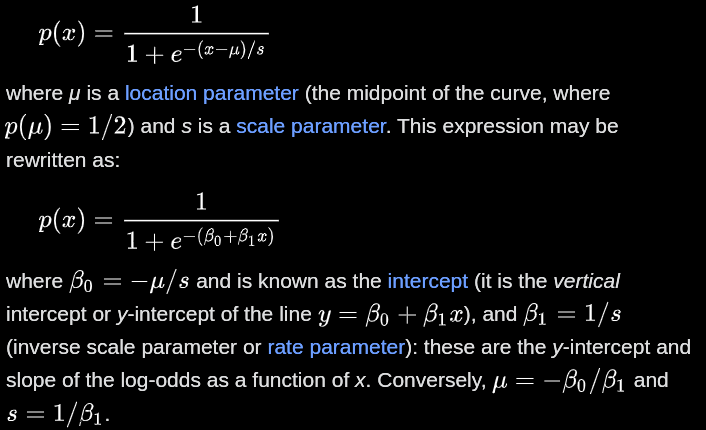

What is even the parameter for this model ?

We can think of them as:
-  miu which represent the function midpoint (ie: where its value equal 0.5) and
- s which represent the steepness

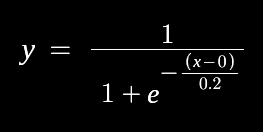

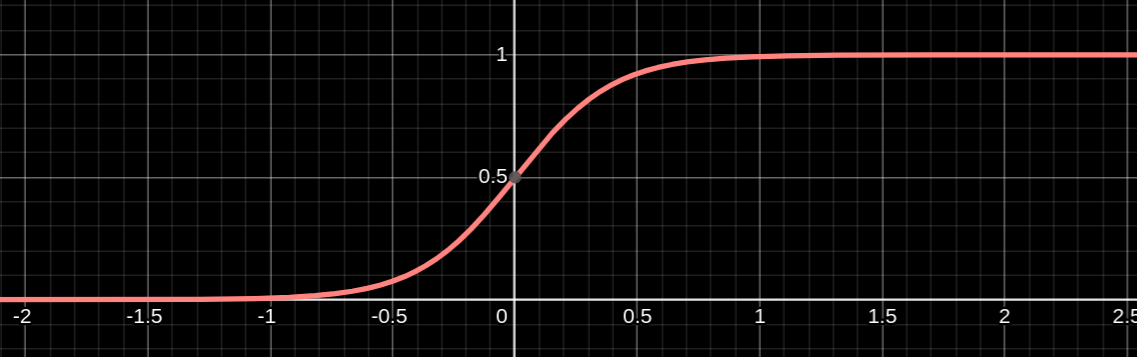

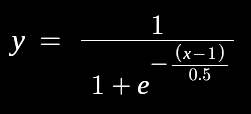

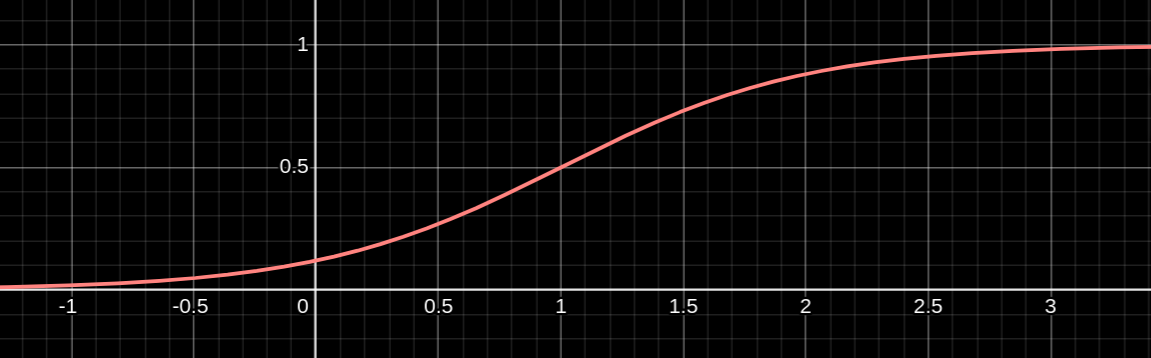

Another way to look at the parameter is as coefficients of linear equation Beta0 and Beta1

The loss function to optimized is called **cross entropy loss** -> give rise to a particular intepretation ( i dont really get it)

https://en.wikipedia.org/wiki/Cross-entropy


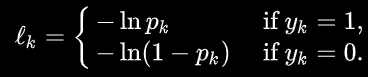

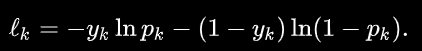

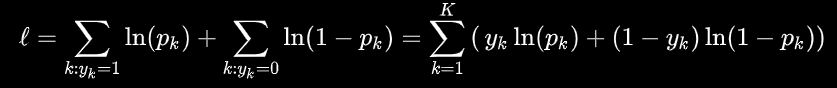

Minimize l can also be intepret as maximize the loglikelihood of sum of pk !! ( make sense)

## Why consider this linear classification?

Apparently the decision boundary of it is linear.

 Actually very intuiative to see! It literally has the form:

-(x-miu)/s = 0

( Decision depend on the power term of e is positive or negative)

# Code

In [10]:
import numpy as np

# Define a function to compute the approximate gradient
# input: multivariate function that range be R; x: position want to calc gradient,represented as a vector; h: parameter to estimate
# output: gradient vector at that position
def compute_gradient(f, x, h=1e-6):
    gradient = np.zeros_like(x)
    for i in range(len(x)):
        x_plus_h = x.copy()
        x_minus_h = x.copy()
        x_plus_h[i] += h
        x_minus_h[i] -= h
        gradient[i] = (f(x_plus_h) - f(x_minus_h)) / (2*h)
    return gradient


def gradient_descent(**kwargs):
    valid_args = {'f', 'initial_point', 'learning_rate', 'max_iterations', 'tolerance'}

    # Check for invalid keyword arguments
    invalid_args = set(kwargs.keys()) - valid_args
    if invalid_args:
        raise ValueError(f"Invalid keyword arguments: {', '.join(invalid_args)}")

    # Check if required keyword arguments are provided
    if 'f' not in kwargs:
        raise ValueError("Function 'f' must be provided.")
    if 'initial_point' not in kwargs:
        raise ValueError("Initial point must be provided.")

    # Extracting keyword arguments with default values
    f = kwargs.get('f')
    initial_point = kwargs.get('initial_point')
    learning_rate = kwargs.get('learning_rate', 0.05)
    max_iterations = kwargs.get('max_iterations', 1000)
    tolerance = kwargs.get('tolerance', 1e-6)

    #print('(time, x, f(x)):')
    x = initial_point
    #x_list = [np.copy(x)]
    #func_list = [f(x)]
    for i in range(max_iterations):
        #print(i,x,f(x))
        gradient = compute_gradient(f, x)
        x -= learning_rate * gradient
        #x_list.append(np.copy(x))
        #func_list.append(f(x))
        if np.linalg.norm(gradient) < tolerance:
            print(f"Gradient descent converged at iteration {i+1}")
            break
    else:
        print("Gradient descent did not converge within the maximum number of iterations.")
    return x

In [45]:
import matplotlib.pyplot as plt
# import the logistic function
from scipy.special import expit

def csv_to_numpy(file_path):

    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    return data

class LogisticRegression:
    def __init__(self, learning_rate=0.06, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.X = None
        self.y = None

    def loss_function(self,w):
        p = expit(self.X @ w.T)
        p = np.clip(p, 1e-15, 1 - 1e-15)
        ones = np.ones(len(self.y))
        loss_vector = -np.log(p)*self.y - np.log(ones - p)* (ones-self.y)
        return np.sum(loss_vector)

    def fit(self, X, y):
        self.y = y
        # Add bias term (intercept) to X (a column with value 1)
        # dimension (n,2)
        self.X = np.column_stack((np.ones(len(X)), X))

        # Initialize weights all 0
        # the shape of weight should be the shape of weights will be (1,2)
        init_weights = np.zeros(self.X.shape[1])

        # Perform gradient descent
        self.weights = gradient_descent(f = self.loss_function, initial_point = init_weights,
                                        learning_rate = self.learning_rate, max_iterations = self.max_iterations,
                                        tolerance = self.tolerance )

    def predict(self, X):
        # Add bias term (intercept) to X
        X = np.column_stack((np.ones(len(X)), X))
        # Predict
        score = X @ self.weights.T
        pred = np.where(score < 0.5, 0, 1)
        return pred

# Test the shape and stuff is correct

In [16]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=4.0, random_state=42)
#X = X.T
print(X.shape)
print(y)

(100, 2)
[0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [17]:
X = np.column_stack((np.ones(len(X)), X))
print(X)

[[  1.          -4.42589457   8.27165022]
 [  1.           8.97208381   6.18837789]
 [  1.          -4.68672852   9.45797649]
 [  1.           7.92811948   9.56034161]
 [  1.           5.54971857   7.2017407 ]
 [  1.          -1.0636152   15.16643239]
 [  1.           5.74664203   5.28190268]
 [  1.          -1.56277489   2.24742158]
 [  1.          -4.07763024   3.16022634]
 [  1.          -5.86606772   7.77743662]
 [  1.          -2.2390848    3.31529338]
 [  1.          -0.30792401  -3.30865677]
 [  1.          -4.38709517  11.1845263 ]
 [  1.          -7.82194182   9.80173107]
 [  1.           1.91977995   2.90218447]
 [  1.           1.50686567   0.68492362]
 [  1.           4.88079968  11.82613813]
 [  1.           0.35630884   3.90305934]
 [  1.           4.87271371  -2.59871151]
 [  1.          -2.14215452   1.06401047]
 [  1.           5.49625381  -3.00978543]
 [  1.           3.87043498   3.17935905]
 [  1.           7.80400662  -1.66438014]
 [  1.           8.49338335   3.62

In [18]:
w = np.ones(X.shape[1])
score = X @ w.T
print(score)
print(expit(score))


[ 4.84575565 16.1604617   5.77124797 18.48846109 13.75145928 15.10281719
 12.02854471  1.6846467   0.0825961   2.91136891  2.07620858 -2.61658078
  7.79743114  2.97978925  5.82196442  3.19178929 17.70693781  5.25936819
  3.2740022  -0.07814405  3.48646838  8.04979403  7.13962649 13.11767674
 11.77987118 16.89167868  8.66924958 16.18015191 10.88875348 17.43509785
  5.63192718 -1.28837629  4.40390627 12.46457838  1.82740104 18.7222994
  9.84704174 12.73232274  2.26408592  0.50186239 11.14442795  5.94366012
  6.86266025  9.21468337  3.6165514  11.34358381 13.62035897  9.7337907
 -1.70507789  5.47404897 13.4791924  -1.64373294  3.78849872 11.28733607
  0.81981661  6.68708769 11.76797866  8.34546642  0.79174966  6.37115359
  6.65724738  9.57519936  7.43911742 -0.16809184  8.96470156  4.6925192
 15.85610338  0.16102425  1.92165102 10.00081276  9.89102233  1.3857123
 16.97147825 15.19207191  9.25258389  8.5841091   5.99775136 11.23117961
 10.1350892   3.22025589  5.92793274 12.50737479  5.911

In [21]:
p = expit(score)
ones = np.ones(len(y))
#print(ones.shape)
loss_vector = -np.log(p)*y - np.log(ones - p)* (ones-y)
print(loss_vector)


[4.85358658e+00 9.58518805e-08 5.77435899e+00 9.34465698e-09
 1.06614650e-06 1.51028175e+01 5.97128925e-06 1.70173030e-01
 7.35297753e-01 2.96434194e+00 2.19435135e+00 2.68708790e+00
 7.79784184e+00 3.02934440e+00 2.95740380e-03 4.02761834e-02
 2.04161861e-08 5.18512220e-03 3.71557187e-02 6.54838274e-01
 3.01496762e-02 3.19116731e-04 7.92733957e-04 2.00939325e-06
 7.65711702e-06 1.68916787e+01 1.71773215e-04 1.61801520e+01
 1.86668225e-05 2.67937318e-08 5.63550245e+00 2.43509241e-01
 4.41606157e+00 1.24645822e+01 1.97653719e+00 7.39620057e-09
 5.29020645e-05 1.27323257e+01 2.36295792e+00 9.75236653e-01
 1.11444424e+01 2.61898118e-03 1.04558045e-03 9.95616857e-05
 2.65204033e-02 1.13435957e+01 1.36203602e+01 9.73384995e+00
 1.67003354e-01 4.18544429e-03 1.39978333e-06 1.76686774e-01
 3.81087602e+00 1.25305320e-05 1.18481552e+00 1.24613214e-03
 1.17679864e+01 2.37442482e-04 3.73665769e-01 6.37286231e+00
 6.65853123e+00 6.94270450e-05 7.43970505e+00 7.80720810e-01
 1.27835602e-04 9.121841

In [22]:
print(np.sum(loss_vector))

329.4901562212342


# Test on real dataset

## 1D

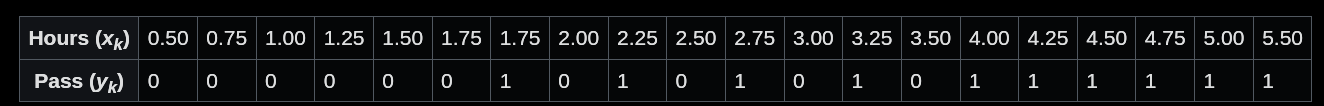

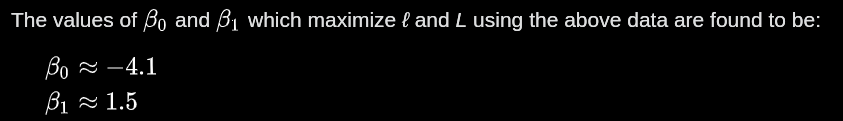

In [35]:
X = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
lr = LogisticRegression(0.04, 5000,1e-6)
lr.fit(X,y)
print(lr.weights)

Gradient descent converged at iteration 1143
[-4.0777102   1.50464434]


## 2D

Gradient descent converged at iteration 1505


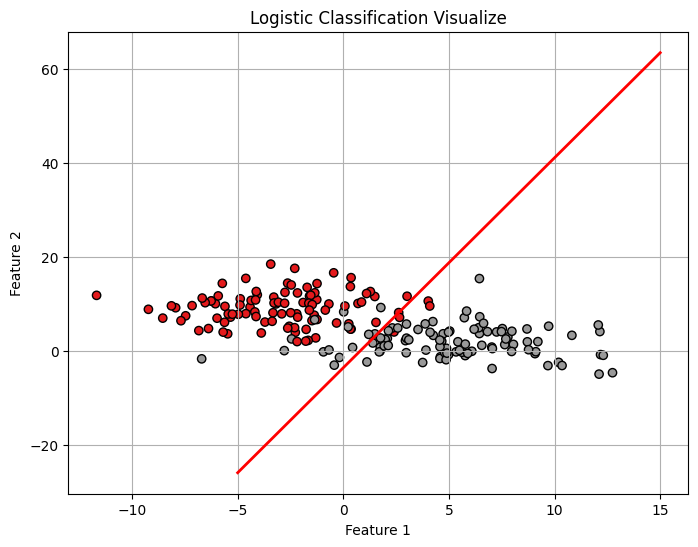

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# Generate synthetic dataset with some overlap
X, y = make_blobs(n_samples=200, centers=2, cluster_std= 3.5, random_state=42)
lr = LogisticRegression(0.005, 50000,1e-6)
lr.fit(X,y)
coeff = lr.weights
w0 = coeff[0]
w1 = coeff[1]
w2 = coeff[2]


# Plot the dataset
plt.figure(figsize=(8, 6))

# Generate x values
x_values = np.linspace(-5, 15, 100)
# Calculate corresponding y values using the equation of the line
y_values = (-w0 / w1) -(w0 / w2)* x_values
# Plot the line
plt.plot(x_values, y_values, color='red', linestyle='-', linewidth=2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Classification Visualize')
plt.grid(True)
plt.show()


In [49]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(0.005, 50000,1e-6)
lr.fit(X_train,y_train)

# Assuming you have trained your model and made predictions
# Example predictions
predictions = lr.predict(X_test)

# Generate classification report
report = classification_report(y_test, predictions)

# Print the report
print(report)

Gradient descent converged at iteration 1783
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.94      0.97        17

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40

